In [23]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [24]:
filename= "data.csv"
raw = pd.read_csv(filename)

### Data Inspection
Let's start exploring the dataset. We will use a number of different methods that Pandas provides, starting with info() which displays all fields, the number of rows and columns as well as the type of the values for each field:

In [25]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [26]:
raw.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


As mentioned, the 'shot_made_flag' field is the target variable. Its value is 1, if Bryant scored that shot and 0 if he failed it. We will next drop the rows in which it has null values as they are not useful for either training or testing. We will use a new dataframe for the cleansed data.

From the initial 30697, the 25697 remain after dropping these rows.

In [27]:
raw.isnull().values.any()

True

In [28]:
raw['shot_made_flag'].isnull().sum()

5000

In [29]:
clean=raw.dropna(subset=['shot_made_flag'])
clean.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


'Minutes_remaining' takes values from 0 to 11, so this is the time in minutes, remaining until the end of each of the four 12-minutes period. 'Seconds_remaining' take values from 0 to 59 (as expected).

We will cobine the two fields to have the time_remaining until the end of each period, in seconds and add it to the dataframe (see the bottom of the info() list and the row count being 26).

In [30]:
clean.insert(len(clean.columns), 'time_remaining', Series(clean.minutes_remaining*60 + clean.seconds_remaining)) 
print(clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 26 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

We will now have a closer look to check the distinct values of the categorical fields.



In [31]:
print(clean.combined_shot_type.unique())
print(clean.action_type.unique())
print(clean.shot_type.unique())

['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving B


Aparently the 'action_type' is a finer-grained categorization of the 'combined_shot_type field'.

Next, let's check the court area variables.

In [32]:
print(clean.shot_zone_area.unique())
print(clean.shot_zone_basic.unique())
print(clean.shot_zone_range.unique())

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


The first two fields are area categorisations, while the last is its distance in "buckets". We will map these areas of the field in the next section.

### Data Visualisation
The most important part of understanding your data is visualisation. We will use a couple of interesting Pandas features for a demonstration of interesting popular techniques and then we will use Tableau as it is a super fast way to mass visualise your dataset. I enjoy using both technologies so I use them in a complementary way.

We will first check to see whether the 'loc_x', 'loc_y', 'lon' and 'lat' fields signify the coordinates of each shot, as suspected. For the rest of our analysis, blue color designates a successful shot ('shot_made_flag'==1), and a red color designates an unsuccessful shot.

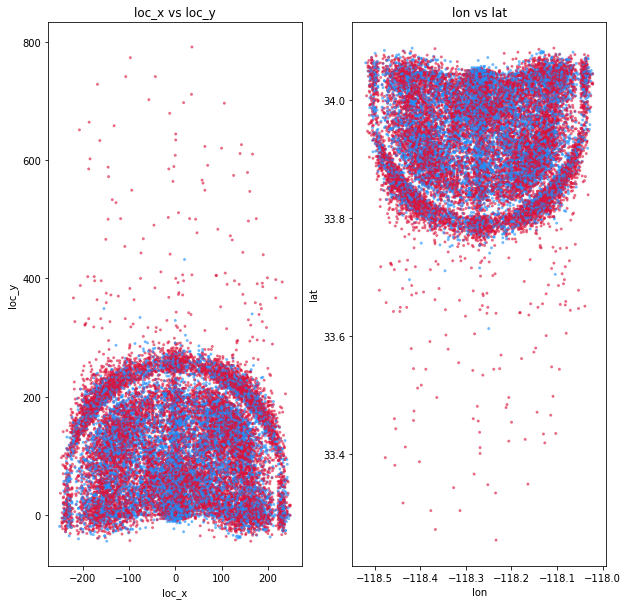

In [33]:
plt.figure(figsize=(10,10))

#Create a colors vector with crimson red at the positions of the dataframe 
#where there is ununsuccessful shot and dodger blue at the positions where there is a successful shot. 

colors = np.where(clean['shot_made_flag']==1, "Dodgerblue", "Crimson");        
colors.shape

#the subplots will have a marker of size=4 and transparency of 50%.

plt.subplot(121)
plt.title('loc_x vs loc_y')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
plt.scatter(clean.loc_x, clean.loc_y, color=colors, s=4, alpha=0.5)

plt.subplot(122)
plt.title('lon vs lat')
plt.xlabel('lon')
plt.ylabel('lat')
plt.scatter(clean.lon, clean.lat, color=colors, s=4, alpha=0.5)

If you pay a close look at these two plots, they look like mirror images. We will get back at this at the second part of this analysis.

We will next check to see whether the area-related fields signify different areas of the court, related to the coordinates and we will map them. To this aim we will use the Pandas groupby utility, which returns a groupby dataframe. We will do it step-by-step for educational purposes. So let's first deepdive a bit into groupby dataframes and how they can be used, befire we actually use them for further visualisation. Let's group by 'shot_zone_area'.

In [34]:
groups =clean.groupby('shot_zone_range')


We can iterate on the groupby dataframe by the column we used to group items on and the rest of the dataframe, as shown next. The following block will show as the different values of the column we grouped by, and the length of each corresponding division in the rest of the dataframe.

In [35]:
for column, frame in groups:
    print('column:{0}, frame:{1}'.format(column, len(frame)))

column:16-24 ft., frame:6907
column:24+ ft., frame:5281
column:8-16 ft., frame:5580
column:Back Court Shot, frame:72
column:Less Than 8 ft., frame:7857


Next, we will define a method that takes any of the area features as an input and groups by the given feature. We will get a linspace of equally spaced points and length equal to the groups created by the given feature's groupby. This will be used to pick a color for a colormap for each one of the groups. Finally we will iterate on the groupby dataframe as above, assigning to each group a different color using zip. Note that in the groupby dataframe, we need [1] to access the rest of the dataframe, as [0] is the groupby feature. As a palette we will use the pre-set colormap Set1 (see the relevant documentation for other palettes).

In [36]:
np.linspace(0, 1, len(groups))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

<Figure size 360x720 with 0 Axes>

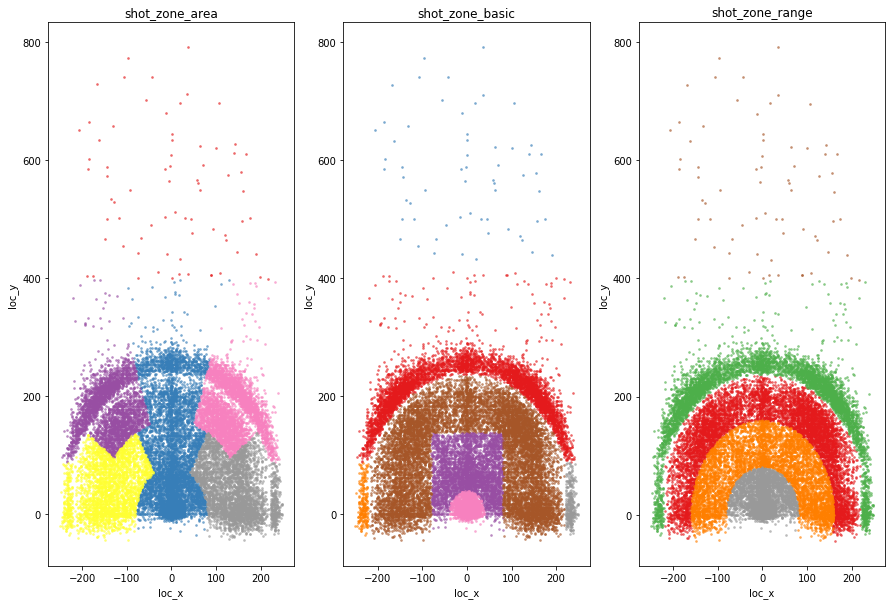

In [37]:
import matplotlib.cm as cm
plt.figure(figsize=(5,10))

def grouped_plot(feature):
    groups = clean.groupby(feature)
    colors = cm.Set1(np.linspace(0, 1, len(groups)))
    for g, c in zip(groups, colors):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, s=3, alpha=0.5)
    
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.title('shot_zone_area')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_area')

plt.subplot(132)
plt.title('shot_zone_basic')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_basic')

plt.subplot(133)
plt.title('shot_zone_range')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_range')

After familiarising with the basics of the dataset, now let’s proceed to fast Tableau analysis in order to double down on the dataset and make it as transparent as possible.

What we want next, is to build an intuition of how predictive each feature is of the target variable ‘shot_made_flag’. Roughly speaking if there is notable variation of the target variable’s distribution across the subsets defined by a feature’s different values, this could be an indication that the feature is predictive of the target variable. It is important to make three notes at this point:

In principle, if a target variable distribution does not vary depending on different values of a feature, this does not necessarily mean that the feature is not predictive. It might be variable in a subset of the dataset and we currently examine the entire set. This means that the feature may be predictive depending on the modelling algorithm and the subsets it creates in its process.
On the other hand, it may happen that a target variable distribution varies across the values of a feature but the feature will not make its way into a good predictive model if it is dependent or correlated to another feature. In that case, it would possibly just add to overfitting. As an example of dependent features, the area variables are mappings of the coordinates, as we showed earlier in the Jupyter notebook.
We can investigate further the empirical intuition of a “notable variation” by running tests to determine its statistical significance.
If the above are difficult to comprehend at this point, don’t worry we will return to these aspects in this series of blogs.

Now let’s examine how ‘shot_made_flag’ distributes for each value of each feature. This is a rather exhaustive exploratory process which in reality can be shorter. Here, we want to show how we can leverage the tools in order to make the dataset completely transparent and build good intuition. We will return to assess these intuitions in retrospective, once we build and evaluate our predictive models, in subsequent parts.

In the first dashboard you can see all features that are dependent on the distance of the shot. Blue are the scored shots and red are failed attempts. More specifically, 1a) shows the success ratio per ‘shot_zone_range’ bucket as given in the dataset. Evidently, the target variable is unevenly distributed across the subsets defined by the range feature. Next, 1b) shows how many shots there are in each bucket in total.

<img src="Graphics/11.png" width="80%" align="left">

In 2) The blue line signifies scored shots per ‘shot_distance’. We can conclude that distance is in feet and one can see the steep increase at the limit of 22-23 ft. where the 3pts line lies. The red line shows the number of failed shots. 3a) shows the success ratio for the 2 and 3 pointers. Finally, 3b) is the share of total 2 and 3 pointers attempted (‘shot_type’).
<img src="Graphics/12.png" width="80%" align="left">

All the above features are correlated, which means that one of the really independent variables will most probably make it to the predictive model. Distance and x/y coordinates are different representation of the independent variable. The rest are mappings of the distance.

In 4) it becomes evident that the target variable is distributed unevenly across the ‘combined_shot_types’ as well.

<img src="Graphics/13.png" width="80%" align="left">

In 5) one can observe that the ‘action_type’ is a more fine grained categorisation of the ‘combined_shot_type’. Again the variability is notable, and so we expect that action type is a good candidate for the predictive model.

<img src="Graphics/14.png" width="80%" align="left">

In 6) we have summarised the performance per ‘period’ of the game and the share of shots in each period. Here we see a more even distribution.

<img src="Graphics/15.png" width="80%" align="left">

7) illustrates the calculated field ‘remaining_time’ until the end of the period.

<img src="Graphics/16.png" width="80%" align="left">

8a) shows the performance against each ‘opponent’:

<img src="Graphics/17.png" width="80%" align="left">

and 8b) ‘matchup’, which is the same as 8a) to the granularity of home and away.

<img src="Graphics/18.png" width="80%" align="left">

Finally, 9) shows the performance for each ‘season’. It seems that Bryant’s performance has started declining towards the end of his career, which is what one would expect that comes naturally with age. Finally, in 10) the performance in the normal period vs the playoffs does not seem to vary (‘playoffs’ flag = 1).

<img src="Graphics/19.png" width="80%" align="left">